In [551]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [473]:
filename = "/Users/actify/Documents/Projects/digvijay_cement/dc_data-input/1 DC Kiln/DC Kiln 2016/daily_kiln_log_sched_20160101_a_day_daily.xls"

In [10]:
data=pd.read_excel(filename ,skiprows=12, header=None)

In [474]:
def read_and_transform_file(filename):
    
     
    df = pd.read_excel(filename, skiprows=6, header=None,nrows=30)
    
#      Extracting the column names
    col_names=df.iloc[0:5, :].ffill(axis=1).T
    col_names = col_names.replace(np.nan, '', regex=True)
    col_names = col_names[0] + "_" + col_names[1] + "_" + col_names[2] +"_" + col_names[3] + "_" + col_names[4]
    col_names[0]='TIME'
    
#     Extracting the data
    df=df.iloc[6:,:]
    
#     Setting column names
    df.columns=col_names    
    
#     Adding date column
    dt=re.search("([0-9]{4}[0-9]{2}[0-9]{2})", filename).group(1)
    
    df['Date'] = dt
    df['TIME'] = pd.to_datetime(df['Date'] + ' ' + df['TIME'], format = "%Y%m%d %H.%M")
#     date_col = pd.to_datetime(df['Date'], infer_datetime_format = True)
    df.set_index('TIME', drop = True, inplace=True)
    df.drop(['Date'], inplace=True, axis =1)
    df=df.astype('float64')
    df['Date'] = pd.to_datetime(dt)
    
#     df['TIME']=time
    
    
    return df
    

In [477]:
df=read_and_transform_file(filename)
df.head()

,TOTAL FEED____T / Hr.,COAL_KILN ST.___T / Hr.,COAL_CAL. ST.___T / Hr.,KILN HOOD_DRFT___mmWg,KILN HOOD_SEC._AIR_TMP_OC,B.Z. TEMP_SEC._AIR_TMP_0C,KILN_SPD_AIR_TMP_RPM,KILN_PWR_AIR_TMP_KW,KILN_TRQ_AIR_TMP_N,KILN I/L_PRESS_AIR_TMP_mmWg,...,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg,AFTER P. H._BFR WTR SPR_DRFT_II_0C,AFTER P. H._AFT WTR SPR_DRFT_II_0C,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg,AFTER P. H._O2_DRFT_II_%,Date
TIME,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,202.114838,0.393243,-0.036237,-0.321139,423.645966,NaN,-0.01094,0.747253,12.248096,-0.305691,...,343.456818,-3.445259,-3.989282,-4.981008,274.361237,176.547211,-6.361760,22.307352,13.455415,2016-01-01
2016-01-01 01:00:00,202.074539,0.137712,-0.037085,-0.334760,417.690460,NaN,-0.01094,0.747253,12.248096,-0.444140,...,353.363739,-3.927147,-5.088862,-5.563694,286.266724,185.005585,-7.163548,22.460649,14.570502,2016-01-01
2016-01-01 02:00:00,202.096024,0.024839,-0.036813,-0.331994,438.170807,NaN,-0.01094,0.747253,12.248096,-0.366063,...,361.227539,-4.031543,-7.628544,-6.030390,293.701355,187.956985,-7.430808,22.332447,14.135745,2016-01-01
2016-01-01 03:00:00,202.097290,0.421759,-0.038170,-0.406152,392.669525,NaN,-0.01094,0.747253,12.248096,-0.339337,...,379.591492,-4.703706,-8.678606,-6.638176,306.638794,195.434753,-8.157981,22.425383,13.344450,2016-01-01
2016-01-01 04:00:00,202.104874,0.036769,-0.037159,-0.082405,413.512360,NaN,-0.01094,0.747253,12.248096,-0.947158,...,395.075134,-5.940782,-9.884008,-7.912764,320.173431,203.510971,-9.380685,22.228331,14.398628,2016-01-01


In [479]:
df.groupby('Date').agg(['mean', 'max'])

TOTAL FEED____T / Hr.             COAL_KILN ST.___T / Hr.           \
                            mean         max                    mean      max   
Date                                                                            
2016-01-01            137.333765  204.841949                3.493099  5.70141   

           COAL_CAL. ST.___T / Hr.            KILN HOOD_DRFT___mmWg            \
                              mean        max                  mean       max   
Date                                                                            
2016-01-01                4.905318  11.771747             -1.436279 -0.067745   

           KILN HOOD_SEC._AIR_TMP_OC              ...  \
                                mean         max  ...   
Date                                              ...   
2016-01-01                639.388897  940.727966  ...   

           AFTER P. H._BFR WTR SPR_DRFT_II_0C              \
                                         mean         max   
Date                                                        
2016-01-01                         372.941795  436.799896   

           AFTER P. H._AFT WTR SPR_DRFT_II_0C              \
                                         mean         max   
Date                                                        
2016-01-01                         299.714359  371.969452   

           AFTER P. H._BFR WTR SPR_DRFT_II_mmWg              \
                                           mean         max   
Date                                                          
2016-01-01                           204.104663  530.174744   

           AFTER P. H._AFT WTR SPR_DRFT_II_mmWg              \
                                           mean         max   
Date                                                          
2016-01-01                           245.893505  591.644897   

           AFTER P. H._O2_DRFT_II_%             
                               mean        max  
Date                                            
2016-01-01                 8.556358  14.570502  

[1 rows x 52 columns]

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2016-01-01 00:00:00 to 2016-01-01 23:00:00
Data columns (total 27 columns):
TOTAL FEED___                                      24 non-null float64
COAL_KILN ST.__                                    24 non-null float64
COAL_CAL. ST.__                                    24 non-null float64
KILN HOOD_DRFT__                                   24 non-null float64
KILN HOOD_SEC._AIR_TMP                             24 non-null float64
B.Z. TEMP_SEC._AIR_TMP                             12 non-null float64
KILN_SPD_AIR_TMP                                   24 non-null float64
KILN_PWR_AIR_TMP                                   24 non-null float64
KILN_TRQ_AIR_TMP                                   24 non-null float64
KILN I/L_PRESS_AIR_TMP                             24 non-null float64
KILN I/L_O2_AIR_TMP                                24 non-null float64
KILN STRING TEMP. & DRAFT_CYCLONE  IV_GAS_TMP      24 non-null float64
KILN ST

In [480]:
kiln_file_name = "/Users/actify/Documents/Projects/digvijay_cement/data/kiln_daily_output_data.csv"

In [481]:
kiln_data=pd.read_csv(kiln_file_name)

In [499]:
kiln_data.head()

,Date,TOTAL FEED____T / Hr._mean,TOTAL FEED____T / Hr._min,TOTAL FEED____T / Hr._max,TOTAL FEED____T / Hr._std,COAL_KILN ST.___T / Hr._mean,COAL_KILN ST.___T / Hr._min,COAL_KILN ST.___T / Hr._max,COAL_KILN ST.___T / Hr._std,COAL_CAL. ST.___T / Hr._mean,COAL_CAL. ST.___T / Hr._min,COAL_CAL. ST.___T / Hr._max,COAL_CAL. ST.___T / Hr._std,KILN HOOD_DRFT___mmWg_mean,KILN HOOD_DRFT___mmWg_min,KILN HOOD_DRFT___mmWg_max,KILN HOOD_DRFT___mmWg_std,KILN HOOD_SEC._AIR_TMP_OC_mean,KILN HOOD_SEC._AIR_TMP_OC_min,KILN HOOD_SEC._AIR_TMP_OC_max,KILN HOOD_SEC._AIR_TMP_OC_std,B.Z. TEMP_SEC._AIR_TMP_0C_mean,B.Z. TEMP_SEC._AIR_TMP_0C_min,B.Z. TEMP_SEC._AIR_TMP_0C_max,B.Z. TEMP_SEC._AIR_TMP_0C_std,KILN_SPD_AIR_TMP_RPM_mean,KILN_SPD_AIR_TMP_RPM_min,KILN_SPD_AIR_TMP_RPM_max,KILN_SPD_AIR_TMP_RPM_std,KILN_PWR_AIR_TMP_KW_mean,KILN_PWR_AIR_TMP_KW_min,KILN_PWR_AIR_TMP_KW_max,KILN_PWR_AIR_TMP_KW_std,KILN_TRQ_AIR_TMP_N_mean,KILN_TRQ_AIR_TMP_N_min,KILN_TRQ_AIR_TMP_N_max,KILN_TRQ_AIR_TMP_N_std,KILN I/L_PRESS_AIR_TMP_mmWg_mean,KILN I/L_PRESS_AIR_TMP_mmWg_min,KILN I/L_PRESS_AIR_TMP_mmWg_max,KILN I/L_PRESS_AIR_TMP_mmWg_std,KILN I/L_O2_AIR_TMP_%_mean,KILN I/L_O2_AIR_TMP_%_min,KILN I/L_O2_AIR_TMP_%_max,KILN I/L_O2_AIR_TMP_%_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_mean,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_min,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_max,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_std,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_mean,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_min,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_max,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_std,AFTER P. H._BFR WTR SPR_DRFT_II_0C_mean,AFTER P. H._BFR WTR SPR_DRFT_II_0C_min,AFTER P. H._BFR WTR SPR_DRFT_II_0C_max,AFTER P. H._BFR WTR SPR_DRFT_II_0C_std,AFTER P. H._AFT WTR SPR_DRFT_II_0C_mean,AFTER P. H._AFT WTR SPR_DRFT_II_0C_min,AFTER P. H._AFT WTR SPR_DRFT_II_0C_max,AFTER P. H._AFT WTR SPR_DRFT_II_0C_std,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_mean,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_min,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_max,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_std,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_mean,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_min,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_max,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_std,AFTER

In [492]:
X = kiln_data.loc[:,'TOTAL FEED____T / Hr._mean' : 'AFTER P. H._O2_DRFT_II_%_std']

In [494]:
y=kiln_data['output']

In [498]:
kiln_data.isna().any()

Date                             False
TOTAL FEED____T / Hr._mean       False
TOTAL FEED____T / Hr._min        False
TOTAL FEED____T / Hr._max        False
TOTAL FEED____T / Hr._std        False
                                 ...  
AFTER P. H._O2_DRFT_II_%_mean    False
AFTER P. H._O2_DRFT_II_%_min     False
AFTER P. H._O2_DRFT_II_%_max     False
AFTER P. H._O2_DRFT_II_%_std     False
output                           False
Length: 106, dtype: bool

In [501]:
null_columns = kiln_data.columns[kiln_data.isna().any()].tolist()

In [525]:
import numpy as np
from sklearn.impute import SimpleImputer

In [526]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [527]:
imp.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [530]:
imputed_X = pd.DataFrame(imp.transform(X))

In [536]:
imputed_X.columns=X.columns

In [555]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [572]:
imputed_X_scaled = pd.DataFrame(preprocessing.scale(imputed_X))
imputed_X_scaled.columns = X.columns
imputed_X_scaled.corr()

,TOTAL FEED____T / Hr._mean,TOTAL FEED____T / Hr._min,TOTAL FEED____T / Hr._max,TOTAL FEED____T / Hr._std,COAL_KILN ST.___T / Hr._mean,COAL_KILN ST.___T / Hr._min,COAL_KILN ST.___T / Hr._max,COAL_KILN ST.___T / Hr._std,COAL_CAL. ST.___T / Hr._mean,COAL_CAL. ST.___T / Hr._min,COAL_CAL. ST.___T / Hr._max,COAL_CAL. ST.___T / Hr._std,KILN HOOD_DRFT___mmWg_mean,KILN HOOD_DRFT___mmWg_min,KILN HOOD_DRFT___mmWg_max,KILN HOOD_DRFT___mmWg_std,KILN HOOD_SEC._AIR_TMP_OC_mean,KILN HOOD_SEC._AIR_TMP_OC_min,KILN HOOD_SEC._AIR_TMP_OC_max,KILN HOOD_SEC._AIR_TMP_OC_std,B.Z. TEMP_SEC._AIR_TMP_0C_mean,B.Z. TEMP_SEC._AIR_TMP_0C_min,B.Z. TEMP_SEC._AIR_TMP_0C_max,B.Z. TEMP_SEC._AIR_TMP_0C_std,KILN_SPD_AIR_TMP_RPM_mean,KILN_SPD_AIR_TMP_RPM_min,KILN_SPD_AIR_TMP_RPM_max,KILN_SPD_AIR_TMP_RPM_std,KILN_PWR_AIR_TMP_KW_mean,KILN_PWR_AIR_TMP_KW_min,KILN_PWR_AIR_TMP_KW_max,KILN_PWR_AIR_TMP_KW_std,KILN_TRQ_AIR_TMP_N_mean,KILN_TRQ_AIR_TMP_N_min,KILN_TRQ_AIR_TMP_N_max,KILN_TRQ_AIR_TMP_N_std,KILN I/L_PRESS_AIR_TMP_mmWg_mean,KILN I/L_PRESS_AIR_TMP_mmWg_min,KILN I/L_PRESS_AIR_TMP_mmWg_max,KILN I/L_PRESS_AIR_TMP_mmWg_std,KILN I/L_O2_AIR_TMP_%_mean,KILN I/L_O2_AIR_TMP_%_min,KILN I/L_O2_AIR_TMP_%_max,KILN I/L_O2_AIR_TMP_%_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_GAS_TMP_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_MT_TMP_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE IV_EX._BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE III_GAS_BOT_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE III_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_mean,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_min,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_max,KILN STRING TEMP. & DRAFT_CYCLONE II_GAS_BOT_OC_std,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_mean,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_min,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_max,KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_std,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_mean,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_min,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_max,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_std,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_mean,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_min,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_max,KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_II_mmWg_std,AFTER P. H._BFR WTR SPR_DRFT_II_0C_mean,AFTER P. H._BFR WTR SPR_DRFT_II_0C_min,AFTER P. H._BFR WTR SPR_DRFT_II_0C_max,AFTER P. H._BFR WTR SPR_DRFT_II_0C_std,AFTER P. H._AFT WTR SPR_DRFT_II_0C_mean,AFTER P. H._AFT WTR SPR_DRFT_II_0C_min,AFTER P. H._AFT WTR SPR_DRFT_II_0C_max,AFTER P. H._AFT WTR SPR_DRFT_II_0C_std,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_mean,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_min,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_max,AFTER P. H._BFR WTR SPR_DRFT_II_mmWg_std,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_mean,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_min,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_max,AFTER P. H._AFT WTR SPR_DRFT_II_mmWg_std,AFTER P. H

In [567]:
lm = LinearRegression()

In [568]:
lm.fit(imputed_X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [569]:
cdf = pd.DataFrame(lm.coef_, index = imputed_X_scaled.columns, columns = ['Coeff'])

In [570]:
cdf.sort_values('Coeff', ascending=False)

,Coeff
KILN_PWR_AIR_TMP_KW_max,27614.165013
KILN_TRQ_AIR_TMP_N_mean,15075.641248
KILN_TRQ_AIR_TMP_N_std,13464.953972
KILN_TRQ_AIR_TMP_N_min,7217.483976
KILN STRING TEMP. & DRAFT_TWIN CYC._DRFT_I_mmWg_min,1506.251354
...,...
KILN STRING TEMP. & DRAFT_CYCLONE II_DRFT_BOT_mmWg_mean,-1298.095357
KILN_PWR_AIR_TMP_KW_min,-7274.481700
KILN_PWR_AIR_TMP_KW_std,-13554.508248
KILN_PWR_AIR_TMP_KW_mean,-15157.185141


In [554]:
cdf.to_csv("/Users/actify/Documents/Projects/digvijay_cement/coefficients.csv")

In [549]:
pred=lm.predict(imputed_X)

In [550]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, pred))
print('MSE:', metrics.mean_squared_error(y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, pred)))

MAE: 493.037448637395
MSE: 567291.6565137825
RMSE: 753.1876635432782


Text(0, 0.5, 'Predicted Y')

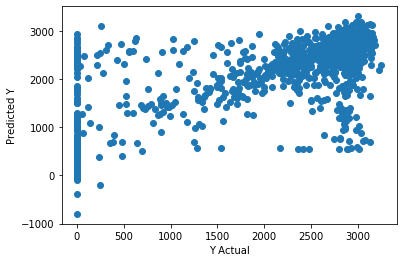

In [552]:
plt.scatter(y,pred)
plt.xlabel('Y Actual')
plt.ylabel('Predicted Y')

# Proportion of variance explained

In [553]:
metrics.explained_variance_score(y, pred)

0.49059945819501616

In [556]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])